In [1]:
import json
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm
import re

In [2]:
def preprocess_answer(answer):
  answer = answer.lower()
  c_answer = re.sub(r'[^A-Za-z0-9 ]+', '', answer)
  return c_answer

In [3]:
def plot_file(prediction_file):
    with open(prediction_file, 'r') as fh:
        data = fh.read()
        doc_data = json.loads(data)
    # Extract question types and accuracy information
    question_types = [item['question_type'] for item in doc_data]
    correct_answers = [1 if preprocess_answer(item['model_answer']) == preprocess_answer(item['gold_answer']) else 0 for item in doc_data]

    # Calculate distribution and accuracy by type
    distribution = Counter(question_types)
    accuracy_by_type = {
        qt: sum(1 for i, item in enumerate(doc_data) if item['question_type'] == qt and correct_answers[i])
        / distribution[qt]
        for qt in distribution
    }
    
    # Create plots
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    # Plot question type distribution
    ax[0].bar(distribution.keys(), distribution.values(), color='skyblue')
    ax[0].set_title('Distribution of Question Types')
    ax[0].set_xlabel('Question Type')
    ax[0].set_ylabel('Count')

    # Plot accuracy by question type
    ax[1].bar(accuracy_by_type.keys(), accuracy_by_type.values(), color='lightgreen')
    ax[1].set_title('Accuracy by Question Type')
    ax[1].set_xlabel('Question Type')
    ax[1].set_ylabel('Accuracy')

    plt.tight_layout()
    plt.show()

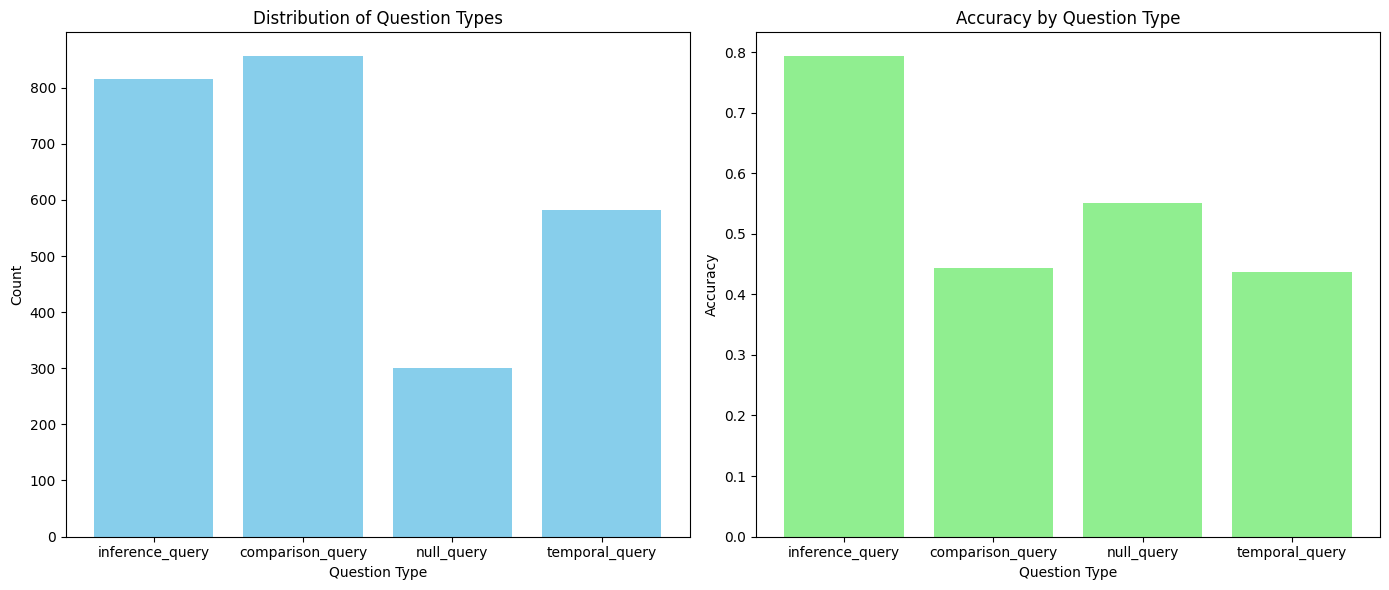

In [4]:
plot_file("output/starling_7b_alpha.json")

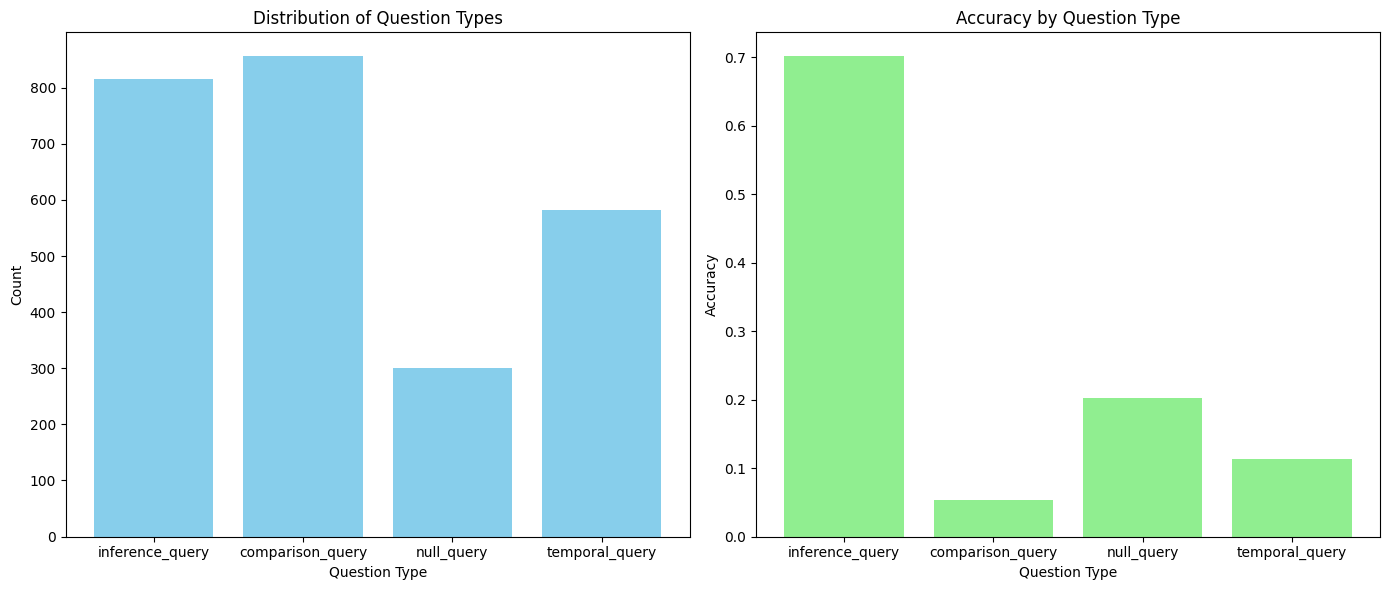

In [5]:
plot_file("output/mistral_7b_instruct_v03.json")

In [6]:
def print_null_query_sample(sample_size, prediction_file):
    with open(prediction_file, 'r') as fh:
        data = fh.read()
        doc_data = json.loads(data)
    print("Examples of 'null_query':")
    null_query_examples = [item for item in doc_data if item['question_type'] == 'null_query'][:sample_size]
    
    for example in null_query_examples:
        print(count_overlap(example['model_answer'], example['gold_answer']))
        print(f"- Query: {example['query']}")
        print(f"  Model Answer: {example['model_answer']}")
        print(f"  Gold Answer: {example['gold_answer']}")
        print()

In [7]:
def print_comparison_query_sample(sample_size, prediction_file):
    with open(prediction_file, 'r') as fh:
        data = fh.read()
        doc_data = json.loads(data)
    print("Examples of 'comparison_query':")
    null_query_examples = [item for item in doc_data if item['question_type'] == 'comparison_query'][:sample_size]
    
    for example in null_query_examples:
        print(count_overlap(example['model_answer'], example['gold_answer']))
        print(f"- Query: {example['query']}")
        print(f"  Model Answer: {example['model_answer']}")
        print(f"  Gold Answer: {example['gold_answer']}")
        print()

In [8]:
def print_temporal_query_sample(sample_size, prediction_file):
    with open(prediction_file, 'r') as fh:
        data = fh.read()
        doc_data = json.loads(data)
    print("Examples of 'temporal_query':")
    null_query_examples = [item for item in doc_data if item['question_type'] == 'temporal_query'][:sample_size]
    
    for example in null_query_examples:
        print(count_overlap(example['model_answer'], example['gold_answer']))
        print(f"- Query: {example['query']}")
        print(f"  Model Answer: {example['model_answer']}")
        print(f"  Gold Answer: {example['gold_answer']}")
        print()

In [9]:
def count_overlap(gold,pred):
  # Standardise by removing all non-alphanumeric characters.
  # The input should be lower cased. But to be safe ...
  g = gold.lower()
  p = pred.lower()
  cg = re.sub(r'[^A-Za-z0-9 ]+', '', g)
  cp = re.sub(r'[^A-Za-z0-9 ]+', '', p)
  gold_words = cg.split()
  pred_words = cp.split()
  glen = len(gold_words)
  plen = len(pred_words)

  # Somewhat destructive as it removes dupes, but is the only sensible way
  # to do it.
  #gold_words = list(set(gold_words))
  #pred_words = list(set(pred_words))
  cnt = 0
  for w in pred_words:
    rv = get_idx(w,gold_words)
    if rv != -1:
      cnt += 1
      v = gold_words.pop(rv)
  return cnt, glen, plen

In [10]:
def get_idx(x,alist):
  for i,c in enumerate(alist):
    if c == x:
      return i
  return -1

In [11]:
print_null_query_sample(10, "output/starling_7b_alpha.json")

Examples of 'null_query':
(0, 24, 2)
- Query: Considering the information from a BBC article detailing Sridevi's achievements in the Indian film industry and a Times of India report on her posthumous honors, which single character from a film portrayed by Sridevi has been recognized for its cultural impact and has also been commemorated with a special award after her passing?
  Model Answer: Sita from the film "Lamhe" has been recognized for its cultural impact and has also been commemorated with a special award after Sridevi's passing
  Gold Answer: Insufficient information.

(0, 1, 2)
- Query: What is the first letter of the name of the company that, according to an article from The Financial Times, received the most European patents in 2021, and is also mentioned in a Bloomberg article as having faced a significant legal challenge at the European Patent Office over one of its key patents?
  Model Answer: S
  Gold Answer: Insufficient information.

(2, 2, 2)
- Query: Considering the 

In [12]:
print_temporal_query_sample(10, "output/starling_7b_alpha.json")

Examples of 'temporal_query':
(0, 1, 1)
- Query: After the TechCrunch report on October 7, 2023, concerning Dave Clark's comments on Flexport, and the subsequent TechCrunch article on October 30, 2023, regarding Ryan Petersen's actions at Flexport, was there a change in the nature of the events reported?
  Model Answer: No
  Gold Answer: Yes

(1, 1, 1)
- Query: Was there no change in the portrayal of Google's influence on the digital ecosystem between the report from The Verge on Google's impact on the internet's appearance published on November 1, 2023, and the report from TechCrunch on a class action antitrust suit against Google published later?
  Model Answer: No
  Gold Answer: no

(0, 2, 1)
- Query: Has the advice provided by Sporting News to bettors regarding the evaluation of betting opportunities and offers involved reading requirements, going with the favored Eagles, and focusing on hype between the reports published on September 28, 2023, and December 18, 2023?
  Model Answer

In [13]:
print_comparison_query_sample(10, "output/starling_7b_alpha.json")

Examples of 'comparison_query':
(1, 1, 1)
- Query: Do the TechCrunch article on software companies and the Hacker News article on The Epoch Times both report an increase in revenue related to payment and subscription models, respectively?
  Model Answer: Yes
  Gold Answer: Yes

(1, 1, 1)
- Query: Does the TechCrunch article on Twitch's subscription revenue split policy indicate a different monetization strategy compared to the TechCrunch article on Beeper's plans for Beeper Mini subscriptions?
  Model Answer: Yes
  Gold Answer: Yes

(0, 1, 1)
- Query: Does 'The New York Times' article attribute the success of the Buffalo Bills' defense to the contributions of Jordan Poyer, while the 'Sporting News' article suggests that the Baltimore Ravens' defense needs to improve before their game against the Cincinnati Bengals?
  Model Answer: No
  Gold Answer: Yes

(1, 1, 1)
- Query: Does 'The Age' article suggest that Australia's Davis Cup team is aiming for an improvement in their performance co

In [14]:
# Function to load the JSON data from a file
def load_json(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

# Function to extract and categorize answers
def categorize_answers(pred_data, gold_data):
    categories = ["yes", "no", "insufficient information"]
    data = {category: Counter({c: 0 for c in categories + ["else"]}) for category in categories}

    for entry in tqdm(pred_data, desc="Processing predictions"):
        query = entry['query']
        model_answer = preprocess_answer(entry['model_answer'])
        gold_answer = preprocess_answer(get_gold_answer(query, gold_data))

        # Assign gold and model answers to appropriate category
        gold_category = gold_answer if gold_answer in categories else "else"
        model_category = model_answer if model_answer in categories else "else"

        if gold_category in data:  # Only count for valid gold categories
            data[gold_category][model_category] += 1

    return data

# Function to get the gold answer for a query
def get_gold_answer(query, gold_data):
    for item in gold_data:
        if item['query'].strip().lower() == query.strip().lower():
            return item['answer']
    return 'else'

# Function to plot a multiple bar chart
def plot_multiple_bar_chart(data):
    categories = list(data.keys())  # X-axis categories: yes, no, insufficient information
    model_categories = ["yes", "no", "insufficient information", "else"]
    bar_width = 0.2

    fig, ax = plt.subplots(figsize=(12, 6))
    x = range(len(categories))  # X-axis positions

    # Plot bars for each model category
    for i, model_category in enumerate(model_categories):
        values = [data[cat][model_category] for cat in categories]
        ax.bar(
            [pos + i * bar_width for pos in x], 
            values, 
            width=bar_width, 
            label=model_category
        )

    ax.set_xlabel("Gold Answer Categories")
    ax.set_ylabel("Count")
    ax.set_title("Distribution of Model Answers per Gold Answer Category")
    ax.set_xticks([pos + 1.5 * bar_width for pos in x])
    ax.set_xticklabels(categories)
    ax.legend(title="Model Answer")

    plt.tight_layout()
    plt.show()

def draw_yesno_plot(pred_file, gold_file):
    # Load the prediction and gold label data
    pred_data = load_json(pred_file)
    gold_data = load_json(gold_file)

    # Categorize answers based on model and gold answers
    categorized_data = categorize_answers(pred_data, gold_data)

    # Plot the results
    plot_multiple_bar_chart(categorized_data)

Processing predictions: 100%|█████████████████████████████████████████████████████| 2556/2556 [00:01<00:00, 1889.05it/s]


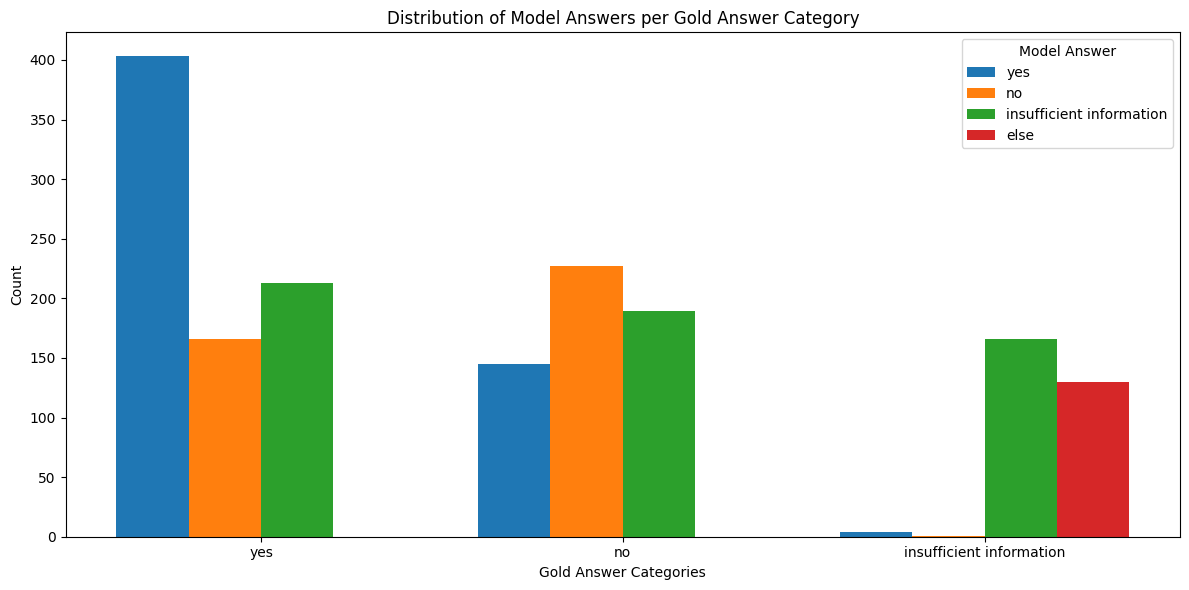

In [15]:
prediction_file = 'output/starling_7b_alpha.json'  # Replace with your prediction file
gold_file = 'data/rag.json'  # Replace with your gold labels file
draw_yesno_plot(prediction_file, gold_file)

Processing predictions: 100%|█████████████████████████████████████████████████████| 2556/2556 [00:01<00:00, 1811.27it/s]


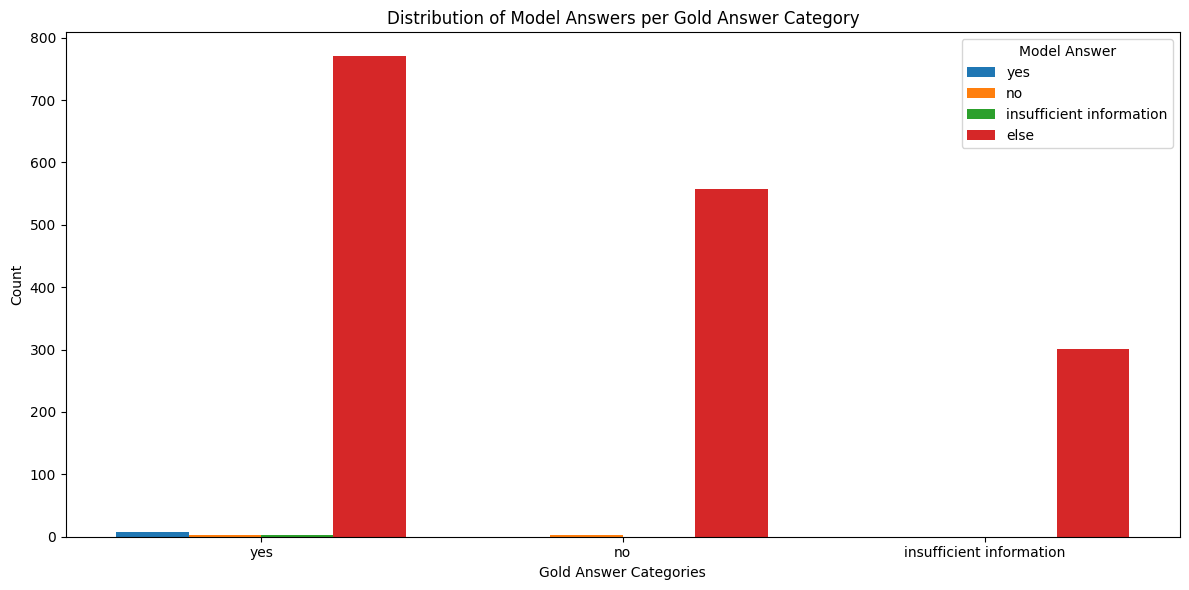

In [16]:
prediction_file = 'output/llama2_7b_hf.json'  # Replace with your prediction file
gold_file = 'data/rag.json'  # Replace with your gold labels file
draw_yesno_plot(prediction_file, gold_file)

Processing predictions: 100%|█████████████████████████████████████████████████████| 2556/2556 [00:01<00:00, 1879.35it/s]


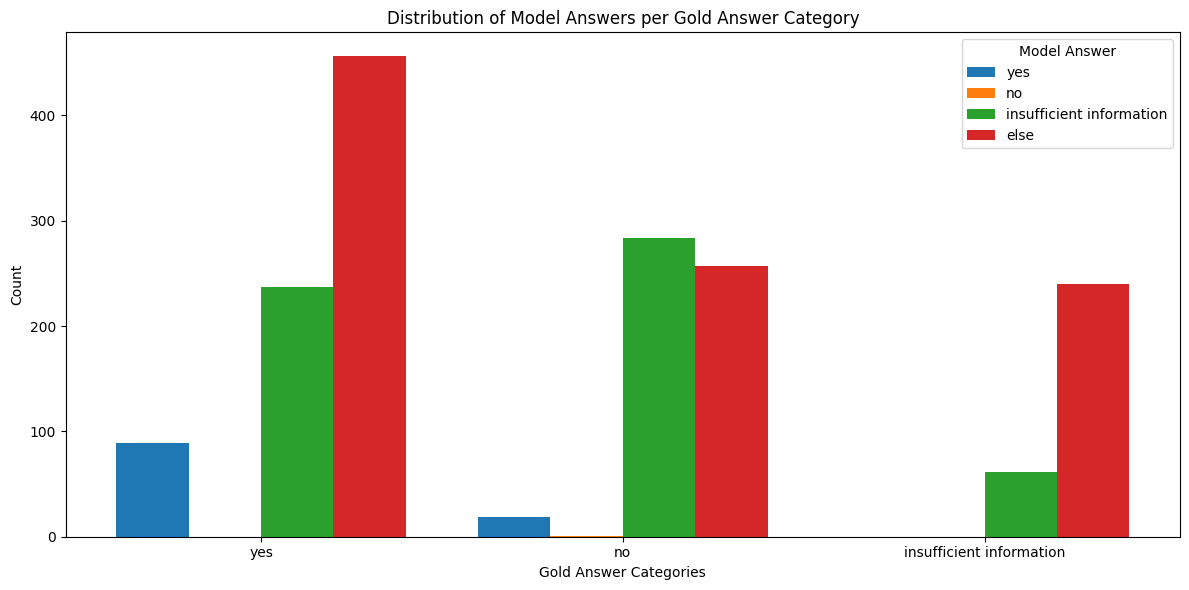

In [17]:
prediction_file = 'output/mistral_7b_instruct_v03.json'  # Replace with your prediction file
gold_file = 'data/rag.json'  # Replace with your gold labels file
draw_yesno_plot(prediction_file, gold_file)

Processing predictions: 100%|█████████████████████████████████████████████████████| 2556/2556 [00:01<00:00, 1752.25it/s]


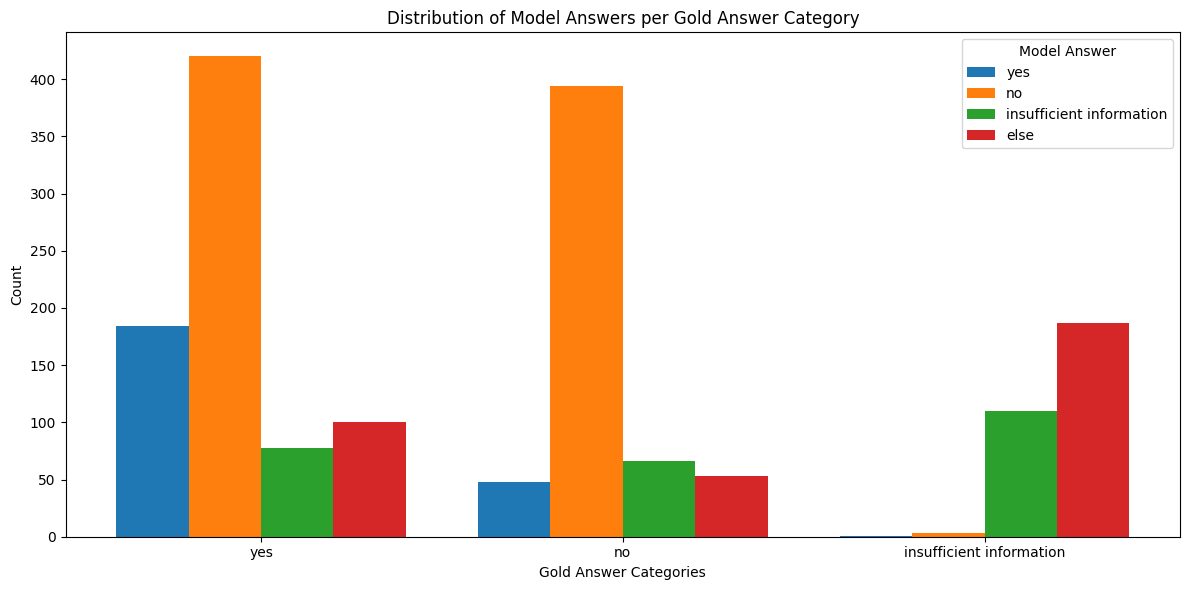

In [18]:
prediction_file = 'output/zephyr_7b_beta.json'  # Replace with your prediction file
gold_file = 'data/rag.json'  # Replace with your gold labels file
draw_yesno_plot(prediction_file, gold_file)

In [19]:
def extract_word_counts(data):
    """Extract word counts from the 'answer' field in the JSON data."""
    word_counts = [len(item['answer'].split()) for item in data]
    return word_counts

def plot_word_distribution(word_counts):
    """Plot a histogram for the word distribution of answers."""
    plt.figure(figsize=(10, 6))
    plt.hist(word_counts, bins=range(1, max(word_counts) + 2), edgecolor='black', align='left')
    plt.title('Distribution of Word Counts in Answers')
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    plt.xticks(range(1, max(word_counts) + 1))
    plt.show()

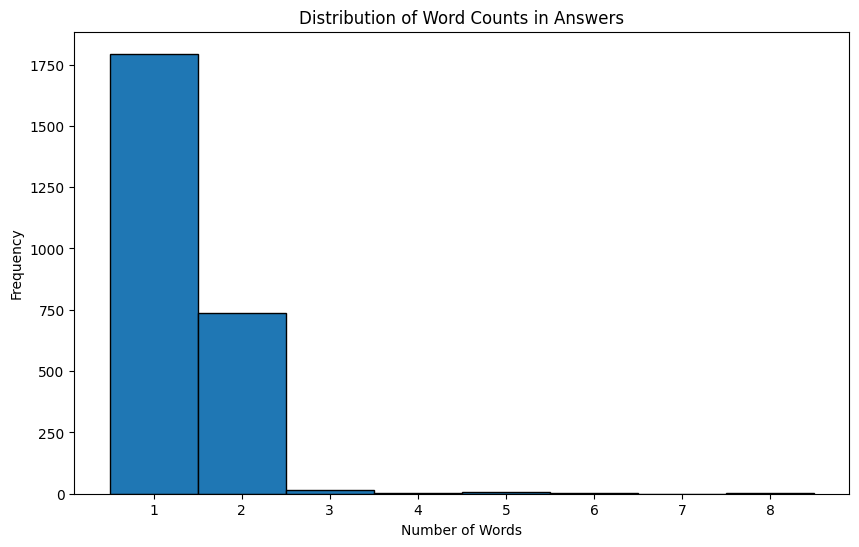

In [20]:
file_path = 'data/rag.json'
data = load_json(file_path)

# Extract word counts from the 'answer' field
word_counts = extract_word_counts(data)

# Plot the word distribution
plot_word_distribution(word_counts)